In [4]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = '/home/oriolcanal/Desktop/master_data_science/advanced_machine_learning/project_1_image_classification/image_classification_ML/train'
validation_dir = '/home/oriolcanal/Desktop/master_data_science/advanced_machine_learning/project_1_image_classification/image_classification_ML/validation'

In [6]:
# Define the image size and batch size
image_size = (32, 32)
batch_size = 32

# Creating a Dataset for the Training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Creating a Dataset for the Validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

In [12]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 107s 85ms/step - loss: 1.8879 - accuracy: 0.3449 - val_loss: 1.6719 - val_accuracy: 0.4040
Epoch 2/50
1250/1250 [==============================] - 108s 87ms/step - loss: 1.5540 - accuracy: 0.4400 - val_loss: 1.3513 - val_accuracy: 0.5282
Epoch 3/50
1250/1250 [==============================] - 110s 88ms/step - loss: 1.4615 - accuracy: 0.4779 - val_loss: 1.2408 - val_accuracy: 0.5491
Epoch 4/50
1250/1250 [==============================] - 111s 89ms/step - loss: 1.3846 - accuracy: 0.5070 - val_loss: 1.2189 - val_accuracy: 0.5589
Epoch 5/50
1250/1250 [==============================] - 107s 86ms/step - loss: 1.3342 - accuracy: 0.5275 - val_loss: 1.0758 - val_accuracy: 0.6250
Epoch 6/50
1250/1250 [==============================] - 108s 86ms/step - loss: 1.2953 - accuracy: 0.5427 - val_loss: 1.1288 - val_accuracy: 0.6033
Epoch 7/50
1250/1250 [==============================] - 107s 86ms/step - loss: 1.2505 - accuracy: 0.5608 - val_loss: 1

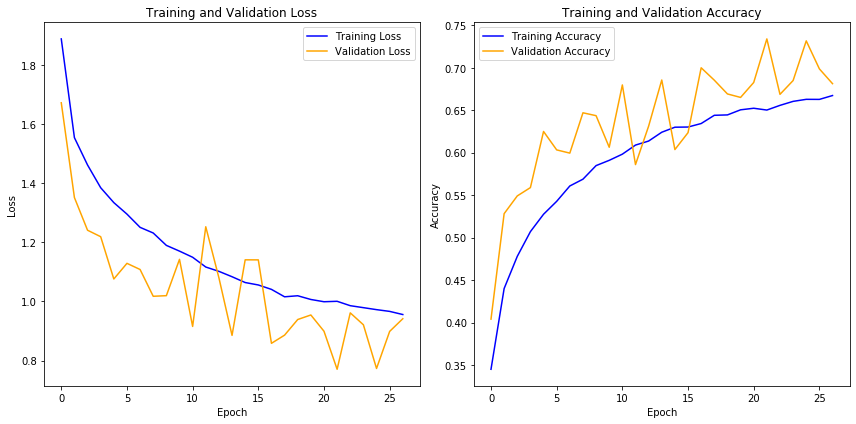

In [13]:
import matplotlib.pyplot as plt

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
